In [1]:
import numpy as np
import pylab as p
import  scipy.integrate  as  ode
import  matplotlib.pyplot  as  plt
import math
import pylab

np . set_printoptions ( linewidth = 130 ,  precision = 13 )
%matplotlib inline

from scipy.optimize import fsolve
from scipy import integrate

In [2]:
#parameters
n = 30

m = np.random.rand(1)/np.random.rand(1)
beta = np.random.rand(1)/np.random.rand(1)
if m > beta:
    temp = m
    m = beta
    beta = temp
    
b = (np.random.rand(30,1) - np.random.rand(30,1))/np.random.rand(1)

gamm =(np.random.rand(1) - np.random.rand(1))/np.random.rand(1)
nu1d = (np.random.rand(30,1) - np.random.rand(30,1))/np.random.rand(1)
nu2d = (np.random.rand(30,30) - np.random.rand(30,30))/np.random.rand(1)

k = np.random.rand(1)/np.random.rand(1)
alp = (np.random.rand(30,30) - np.random.rand(30,30))/np.random.rand(1)

In [3]:
#computation
S_star = m/beta
T_star = 1 - S_star
I_star = m*T_star/(m + beta*k*T_star)
J_star = T_star - I_star

detP = I_star*J_star - 2*(T_star)**2

teth1 = -2*m*(T_star)**2/detP
teth2 = gamm*I_star*(I_star + T_star)/detP
teth3 = gamm*T_star*J_star/detP
teth4 = -m*(J_star)**2/detP

Teth = teth1 - teth2 - teth3 + teth4

lamd = np.zeros((n,n))
for i in range (0,n-1):
    for j in range (0,n-1):
        lamd[i][j] = teth1*(b[i] - b[j]) + teth2*(nu1d[i] - nu1d[j]) + teth3*(nu2d[i][j] + nu2d[j][i] - 2*nu2d[j][j]) + teth4*(I_star/J_star*(alp[j][i] - alp[i][j]) + alp[j][i] - alp[j][j])

In [4]:
#replicator system
def du_dt(u, t = 0):
    return Teth*u*(np.dot(lamd,u) - np.dot(np.dot(lamd,u),u))

u0 = np.random.random(n) #random initial data
u0 = u0/sum(u0)

t = np.linspace(0, 100, 2000)

u, infodict = integrate.odeint(du_dt, u0, t, full_output=True)
infodict['message']

'Integration successful.'

No handles with labels found to put in legend.


Text(0, 0.5, 'Frequencies $u_i$')

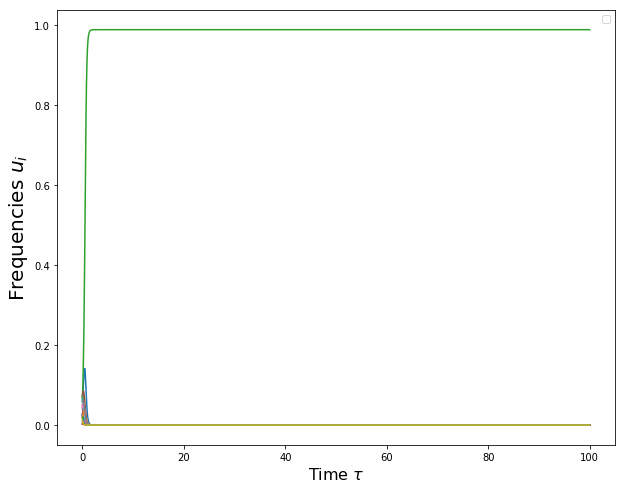

In [7]:
s = []
for i in range(0,n-1):
    s.append(u.T[i])
    
f1 = plt.figure(figsize=(10, 8))
for i in range(0,n-1):
    plt.plot(t, s[i])

plt.legend(loc='best')
plt.xlabel("Time $\\tau$",fontsize=16)
plt.ylabel("Frequencies $u_i$",fontsize = 20)